In [130]:
import numpy as np
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm



import warnings 
warnings.filterwarnings("ignore")

In [131]:
df = pd.read_csv("data.csv")
old_data = pd.read_csv("SpotifyFeatures.csv")

In [132]:
new = df.merge(old_data, left_on = 'id', right_on='track_id')
new.sample(15)

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,...,energy_y,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,time_signature,valence_y
23911,0.091500,['Salt-N-Pepa'],0.939,248573,0.675,0,0Pu71wxadDlB8fJXfjIjeJ,0.000000,0,0.0565,...,0.675,0.000000,C,0.0565,-7.232,Major,0.2110,96.918,4/4,0.795
107,0.002630,['The Specials'],0.857,191213,0.526,0,4rAO7Ik17Qw2y8ApqWDiKK,0.000331,2,0.2640,...,0.526,0.000331,D,0.2640,-9.236,Major,0.0747,103.066,4/4,0.884
70163,0.388000,['Miranda Lambert'],0.491,272640,0.352,0,7A35lRz4cm0QkbnlNAJPtm,0.000006,0,0.1030,...,0.352,0.000006,C,0.1030,-9.856,Major,0.0426,188.861,3/4,0.325
44255,0.002460,['Maroon 5'],0.657,225307,0.679,0,6TwfdLbaxTKzQi3AgsZNzx,0.000000,2,0.2110,...,0.679,0.000000,D,0.2110,-5.511,Major,0.0269,120.007,4/4,0.331
37469,0.011400,['Kirko Bangz'],0.451,232160,0.632,1,3m8CQnnfJJp4eQMWWl3zay,0.000000,8,0.1980,...,0.632,0.000000,G#,0.1980,-7.980,Minor,0.2970,132.890,4/4,0.234
20746,0.786000,['Ricky Nelson'],0.774,229800,0.247,0,7J5tyfg3OYVNR97KH66ovw,0.018600,2,0.1160,...,0.244,0.019600,D,0.1150,-21.556,Major,0.0843,143.972,4/4,0.832
28401,0.043100,['Skillet'],0.640,178013,0.957,0,2UREu1Y8CO4jXkbvqAtP7g,0.000000,8,0.0789,...,0.957,0.000000,G#,0.0789,-2.336,Major,0.0741,134.992,4/4,0.692
47471,0.045100,"['Limp Bizkit', 'Redman', 'Method Man', 'DMX']",0.589,382827,0.884,1,3nsxMrnYlfBNotHRevTRgM,0.000000,7,0.0904,...,0.884,0.000000,G,0.0962,-4.894,Major,0.2640,89.905,4/4,0.445
4588,0.294000,['Tabu Ley Rochereau'],0.535,512400,0.587,0,39TdLWLrPPqzv1vCEQnIXE,0.025000,1,0.1360,...,0.587,0.025000,C#,0.1360,-13.684,Major,0.1280,96.827,3/4,0.826
46431,0.000085,['Primal Scream'],0.622,422600,0.540,0,7dSBZzVmyBaLDxT2v3EJHB,0.629000,8,0.8400,...,0.540,0.629000,G#,0.8400,-14.741,Major,0.0545,91.139,4/4,0.870


In [133]:
df.sample(15)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
147305,0.507000,['Pat Boone'],0.686,137320,0.4180,0,5XjPPdhCGeAEecJlxAJt3M,0.000032,0,0.1700,-9.744,1,Don't Forbid Me,30,1964-01-01,0.0259,112.437,0.69200,1964
40478,0.655000,['Эрнест Хемингуэй'],0.718,140800,0.1240,1,3z16lEu3PdvNw43QCEIoyC,0.000000,0,0.4250,-16.207,1,Часть 77.2 - По ком звонит колокол,0,1940,0.9570,111.965,0.63900,1940
4387,0.989000,"['Johann Sebastian Bach', 'András Schiff']",0.328,230133,0.0379,0,67xPOt3ADlj5YCMDkLRSUU,0.914000,7,0.1160,-31.113,1,"Aria mit 30 Veränderungen, BWV 988 ""Goldberg V...",35,1983-01-01,0.0413,64.326,0.28200,1983
99879,0.995000,['Amirbai Karnataki'],0.499,215220,0.0965,0,0R566d5gSjUNeQsFI3mv4j,0.009990,9,0.0976,-9.314,1,Dar Pe Tere Ek Dukh Se Bhare Dil,0,1946-12-31,0.0832,90.645,0.47700,1946
2972,0.666000,['Johnnie Taylor'],0.787,161867,0.3400,0,4wDc6NoaIOJd7rL6MFhFCY,0.000017,9,0.0658,-14.674,1,Just The One (I've Been Looking For),35,1969-01-01,0.0517,100.036,0.82400,1969
93862,0.273000,['The Police'],0.833,179067,0.6630,0,4frelkLhC4ATqJH9VGJztu,0.016000,9,0.0327,-7.859,0,Spirits In The Material World,55,1981-10-02,0.0580,141.551,0.85900,1981
30856,0.702000,['The Beach Boys'],0.169,170083,0.4280,0,1kfiVmfrGvHKdZORtXCaVS,0.000640,9,0.1630,-8.368,0,The Warmth Of The Sun - Remastered,46,2007-01-01,0.0299,203.585,0.29700,2007
116356,0.386000,['Brett Young'],0.607,226200,0.5360,0,1DA7FEKgQeyRPtU44L5DOf,0.000000,10,0.1020,-7.306,1,In Case You Didn't Know,66,2017-02-10,0.0305,147.986,0.43400,2017
23944,0.996000,['Granular'],0.121,133583,0.6330,0,4RTVyXYNmaKyqVDnmU4gJZ,0.424000,10,0.1260,-24.715,0,Dream,67,2018-09-05,0.0560,78.844,0.00001,2018
58135,0.332000,['Elton John'],0.331,418493,0.5140,0,6z88bsyDxJSDkGPjb5bVAn,0.000241,0,0.1800,-8.618,1,Gulliver/It's Hay Chewed - Reprise Version,23,1969-06-06,0.0402,72.159,0.28900,1969


### <b>Data Description</b>
<font size=3>

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
    
artists: The name(s) of the artist(s) who perform the track.
    
danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
duration_ms: A track's duration in milliseconds.
    
energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
explicit: Whether the track was labeled as "explicit" due to content. 1 = Yes, 0 = No.
    
id: Track's unique identifier.
    
instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    
liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. NOTE: Loudness is measured negatively here on purpose. This is because we are dealing with digital sound that a computer can listen to which is measured differently than what the human ear can listen to. This is sometimes why you will see negative numbers when you adjust the volume on your surround sound system. For more information on this, you can read this article: https://www.cablechick.com.au/blog/why-does-my-amplifier-use-negative-db-for-volume/
    
mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
name: Name of Track
    
popularity: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
    
release_date: Date of track's release.
    
speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
year: Year of track's release.
    


In [134]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [135]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [136]:
df.shape

(169909, 19)

In [137]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169393,0.000163,['5 Seconds of Summer'],0.507,221716,0.850,0,6U0D8PIh75fnX6T6TWJLxl,0.000000,11,0.0812,-4.274,0,Jet Black Heart,61,2015-10-23,0.0330,153.957,0.545,2015
34650,0.601000,['The Beach Boys'],0.522,136400,0.252,0,1LwiP981p77q2Fxud5XU2E,0.000000,2,0.4620,-11.162,1,Devoted To You - Remastered,18,1965-11-08,0.0262,93.763,0.427,1965
157819,0.000620,['Pretenders'],0.550,253893,0.897,0,0jd7dO9tw7BhW8zqKVgLY8,0.065600,0,0.0621,-6.927,1,Show Me - 2007 Remaster,35,1984,0.0395,139.299,0.562,1984
96502,0.382000,['Irene Cara'],0.532,244533,0.729,0,0aAR5HogGoT68EWFbyRFqx,0.000000,10,0.3660,-6.840,1,What A Feeling,70,2007-01-01,0.0474,121.970,0.595,2007
63605,0.995000,['Κώστας Ρούκουνας'],0.515,188493,0.262,0,2BZ1gBuPvPuGrTU53KHvBt,0.000000,4,0.1430,-12.487,0,Ντριγκ ντριγκ τα ποτηράκια,0,1950-01-01,0.0582,75.030,0.961,1950
48979,0.876000,['Fairuz'],0.386,171360,0.347,0,2I5oJLRilLbffWyIoNl59Y,0.471000,6,0.0645,-9.319,1,Layali L'mona,1,1953,0.0442,112.859,0.569,1953
159959,0.283000,['Jay Chou'],0.674,226773,0.649,0,32nainF4TXsMpuFOGCkzzM,0.058800,1,0.2260,-5.869,1,夜曲,55,2005-11-01,0.0452,86.984,0.600,2005
157037,0.895000,['Gordon Lightfoot'],0.575,208467,0.116,0,1QcKPDqCqpMTtOJGv0Jygf,0.000196,0,0.1870,-20.541,1,I'm Not Supposed to Care,34,1976,0.0293,111.126,0.246,1976
167596,0.467000,"['Kenny G', 'Michael Bolton']",0.509,244827,0.323,0,6qB2W0DcQo2kLyqw2JUo5k,0.000010,7,0.2040,-14.787,0,You Send Me (with Michael Bolton),48,1997-11-08,0.0258,96.251,0.337,1997
60479,0.363000,['Jimmy Buffett'],0.543,195160,0.279,0,12I7dGEGjiUdX5l9g8rdPr,0.005920,2,0.0777,-13.984,1,The Captain And The Kid,29,1992-05-19,0.0319,112.065,0.393,1992


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [139]:
df.drop(['id'], axis=1, inplace=True)

In [140]:
print("Unique Keys -> ", len(df.key.unique()))
df.key.unique()

Unique Keys ->  12


array([10,  8,  5,  1, 11,  6,  9,  7,  4,  2,  3,  0], dtype=int64)

In [141]:
print("Unique Artists -> ",len(df.artists.unique())) #artists are in list fix this

Unique Artists ->  33375


In [142]:
df['popularity'] = df['popularity'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)

In [143]:
continuous_columns = [col for col in df.columns if df[col].dtype == float or df[col].dtype == int]
categorical_columns = [col for col in df.columns if df[col].dtype == object]

In [144]:
print("Continuous Columns -> ",continuous_columns)
print("Categorical Columns -> ",categorical_columns)

Continuous Columns ->  ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']
Categorical Columns ->  ['artists', 'name', 'release_date']


## Exploratory Data Analysis

- check for bias (across genres, key, mode)
- dist of popularity
- Correlation Matrix
- popularity relation with features (regression)

### Checking data balance

In [145]:
print(df['year'].min())
print(df['year'].max())
df['year'].unique()

1921
2020


array([1928, 1930, 1935, 1936, 1940, 1942, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1929, 1931, 1932, 1933, 1934, 1937, 1938, 1939, 1941, 1943,
       1944], dtype=int64)

In [146]:
df1 = df.groupby('year', as_index=False).size().sort_values(by='size',ascending=True)
df2 = df.groupby('key', as_index=False).size().sort_values(by='size',ascending=True)
df3 = df.groupby('mode', as_index=False).size().sort_values(by='size',ascending=True)
df4 = df.groupby('explicit', as_index=False).size().sort_values(by='size',ascending=True)

In [147]:
df1['Year Bin'] = pd.cut(df1['year'], bins = range(1920,2021,10))

In [148]:
df1.sample(5)

,year,size,Year Bin
54,1975,2000,"(1970, 1980]"
41,1962,2000,"(1960, 1970]"
58,1979,2000,"(1970, 1980]"
4,1925,263,"(1920, 1930]"
21,1942,1649,"(1940, 1950]"


In [149]:
df56 = df1.groupby('Year Bin', as_index=False)['size'].sum()
df56

,Year Bin,size
0,"(1920, 1930]",6260
1,"(1930, 1940]",9075
2,"(1940, 1950]",14968
3,"(1950, 1960]",19950
4,"(1960, 1970]",20000
5,"(1970, 1980]",20000
6,"(1980, 1990]",20000
7,"(1990, 2000]",20000
8,"(2000, 2010]",20000
9,"(2010, 2020]",19656


Text(0.5, 1.0, 'Number of songs per decade')

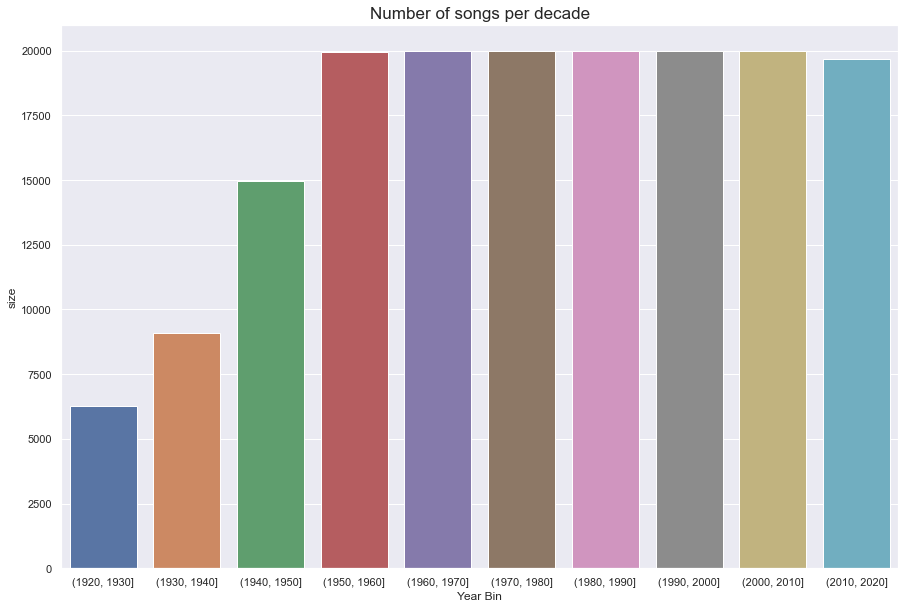

In [150]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year Bin', y='size', data=df56).set_title("Number of songs per decade", fontsize=17)

Text(0.5, 1.0, 'Number of songs per key')

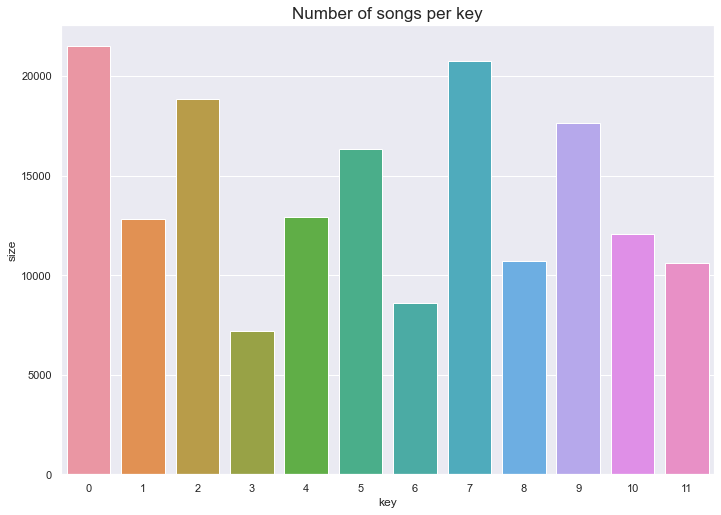

In [151]:
sns.barplot(x='key', y='size', data=df2).set_title("Number of songs per key", fontsize=17)

Text(0.5, 1.0, 'Number of songs per mode')

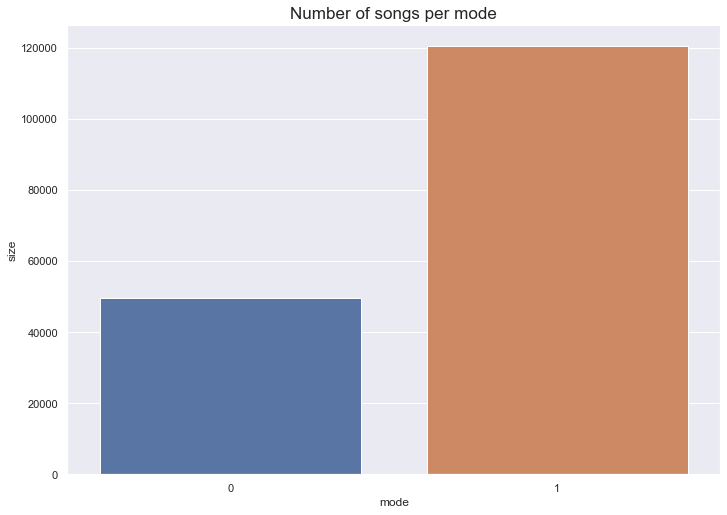

In [152]:
sns.barplot(x='mode', y='size', data=df3).set_title("Number of songs per mode", fontsize=17)

Text(0.5, 1.0, 'Number of songs per explict rate')

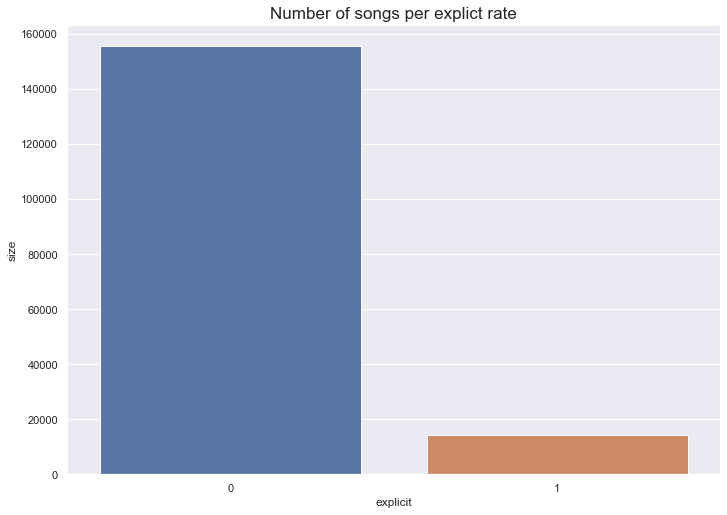

In [153]:
sns.barplot(x='explicit', y='size', data=df4).set_title("Number of songs per explict rate", fontsize=17)

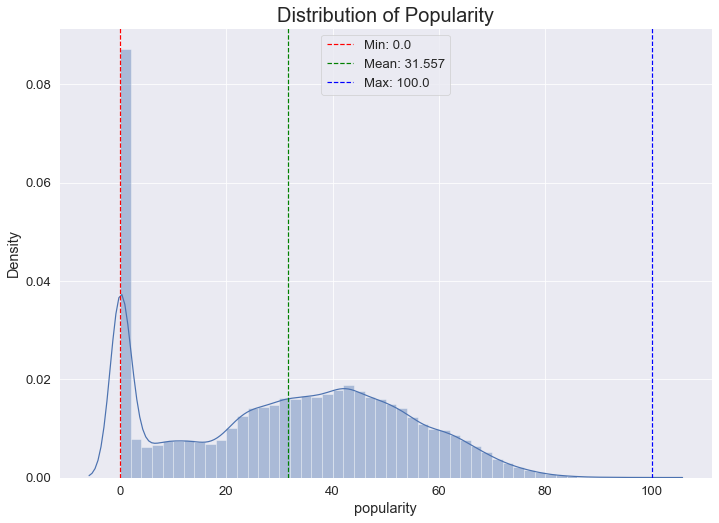

In [154]:
# Distribution of popularity score
sns.set_context("paper", font_scale=1.5)
sns.distplot(df.popularity).set_title("Distribution of Popularity", fontsize=20)
plt.axvline(df.popularity.min(), 0,1, label="Min: " + str(df.popularity.min()), color = 'red', linestyle='dashed')
plt.axvline(df.popularity.mean(), 0,1, label="Mean: " + str(round(df.popularity.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.popularity.max(), 0,1, label="Max: " + str(df.popularity.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [155]:
# df_by_artist = df.groupby('artist_name', as_index=False).size().sort_values(by='size',ascending=True)
# df_by_artist.sample(15)

In [156]:
# df_by_tempo = df.groupby('tempo', as_index=False).size().sort_values(by='size',ascending=True)
# df_by_tempo.sample(5)

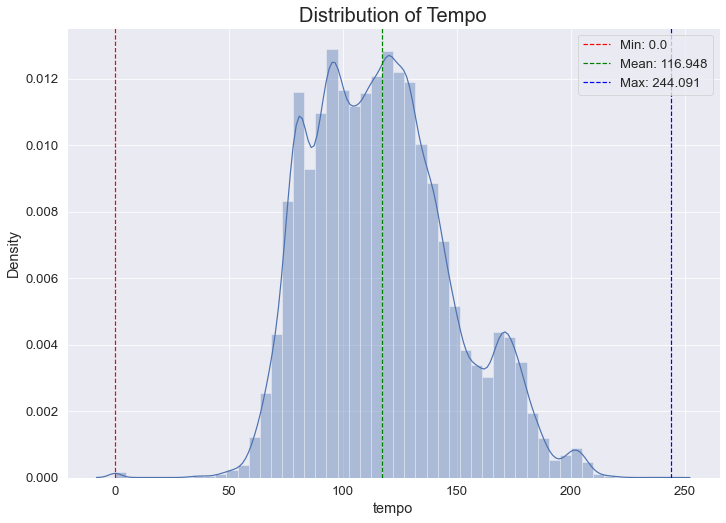

In [157]:
sns.distplot(df.tempo).set_title("Distribution of Tempo", fontsize=20)
plt.axvline(df.tempo.min(), 0,1, label="Min: " + str(df.tempo.min()), color = 'red', linestyle='dashed')
plt.axvline(df.tempo.mean(), 0,1, label="Mean: " + str(round(df.tempo.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.tempo.max(), 0,1, label="Max: " + str(df.tempo.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [158]:
# df_valence = df.groupby('valence', as_index=False).size().sort_values(by='size',ascending=True)
# df_valence.sample(5)

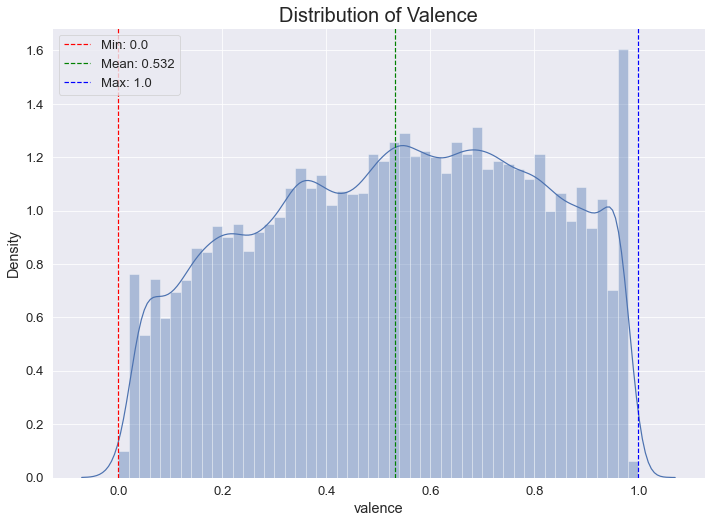

In [159]:
sns.distplot(df.valence).set_title("Distribution of Valence", fontsize=20)
plt.axvline(df.valence.min(), 0,1, label="Min: " + str(df.valence.min()), color = 'red', linestyle='dashed')
plt.axvline(df.valence.mean(), 0,1, label="Mean: " + str(round(df.valence.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.valence.max(), 0,1, label="Max: " + str(df.valence.max()), color = 'blue', linestyle='dashed')
plt.legend()

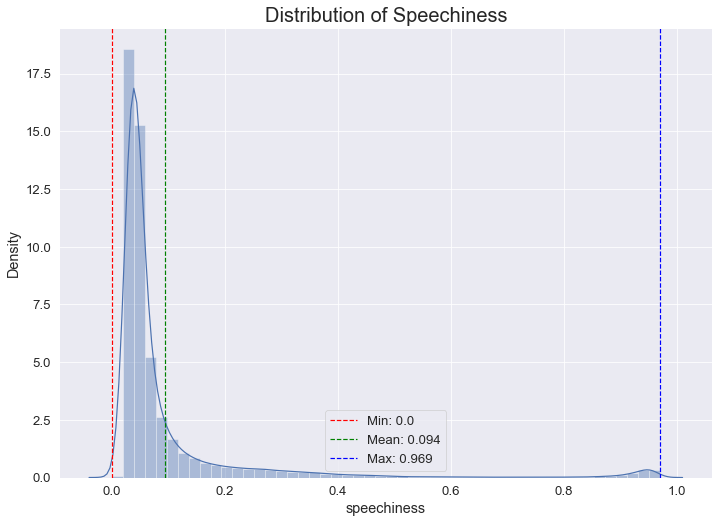

In [160]:
sns.distplot(df.speechiness).set_title("Distribution of Speechiness", fontsize=20)
plt.axvline(df.speechiness.min(), 0,1, label="Min: " + str(df.speechiness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.speechiness.mean(), 0,1, label="Mean: " + str(round(df.speechiness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.speechiness.max(), 0,1, label="Max: " + str(df.speechiness.max()), color = 'blue', linestyle='dashed')
plt.legend()

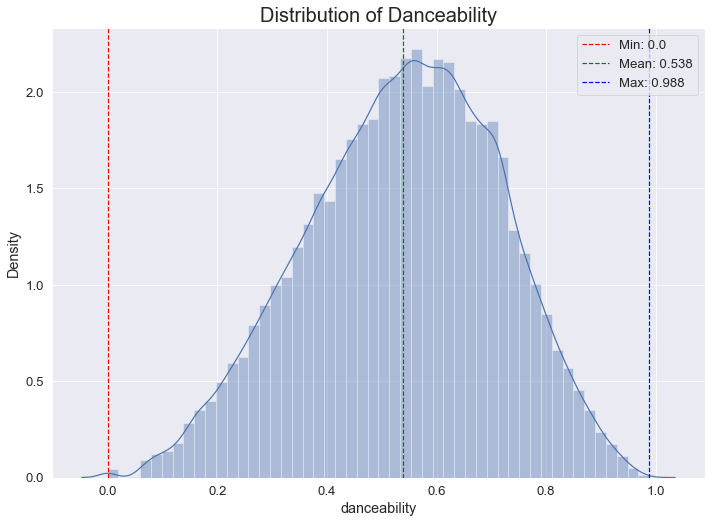

In [161]:
sns.distplot(df.danceability).set_title("Distribution of Danceability", fontsize=20)
plt.axvline(df.danceability.min(), 0,1, label="Min: " + str(df.danceability.min()), color = 'red', linestyle='dashed')
plt.axvline(df.danceability.mean(), 0,1, label="Mean: " + str(round(df.danceability.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.danceability.max(), 0,1, label="Max: " + str(df.danceability.max()), color = 'blue', linestyle='dashed')
plt.legend()

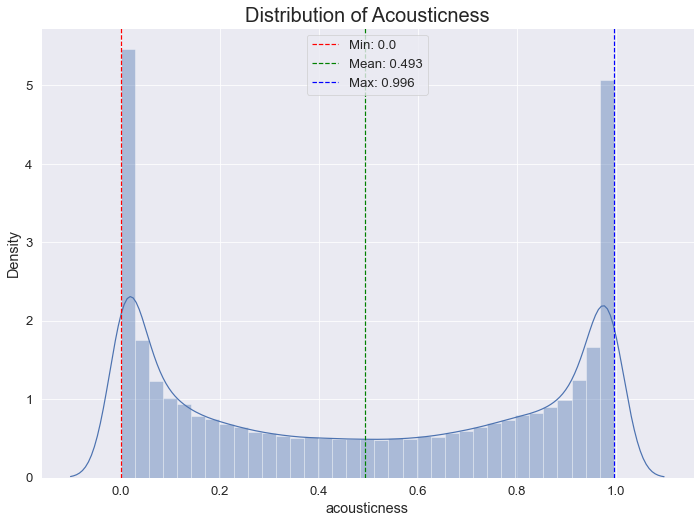

In [162]:
sns.distplot(df.acousticness).set_title("Distribution of Acousticness", fontsize=20)
plt.axvline(df.acousticness.min(), 0,1, label="Min: " + str(df.acousticness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.acousticness.mean(), 0,1, label="Mean: " + str(round(df.acousticness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.acousticness.max(), 0,1, label="Max: " + str(df.acousticness.max()), color = 'blue', linestyle='dashed')
plt.legend()

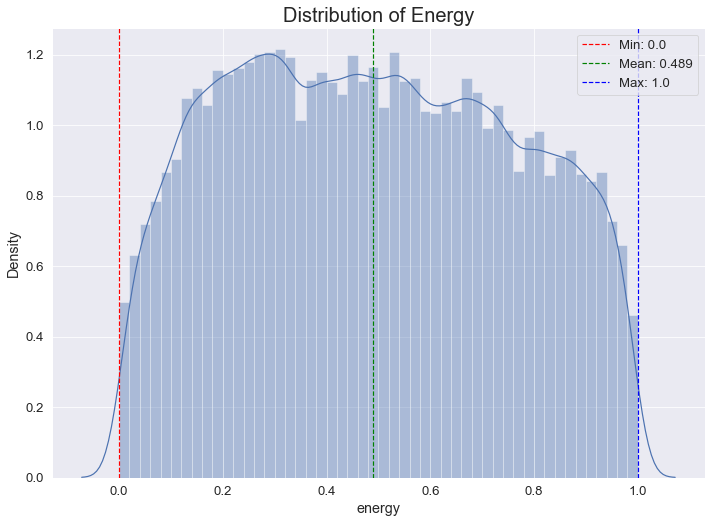

In [163]:
sns.distplot(df.energy).set_title("Distribution of Energy", fontsize=20)
plt.axvline(df.energy.min(), 0,1, label="Min: " + str(df.energy.min()), color = 'red', linestyle='dashed')
plt.axvline(df.energy.mean(), 0,1, label="Mean: " + str(round(df.energy.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.energy.max(), 0,1, label="Max: " + str(df.energy.max()), color = 'blue', linestyle='dashed')
plt.legend()

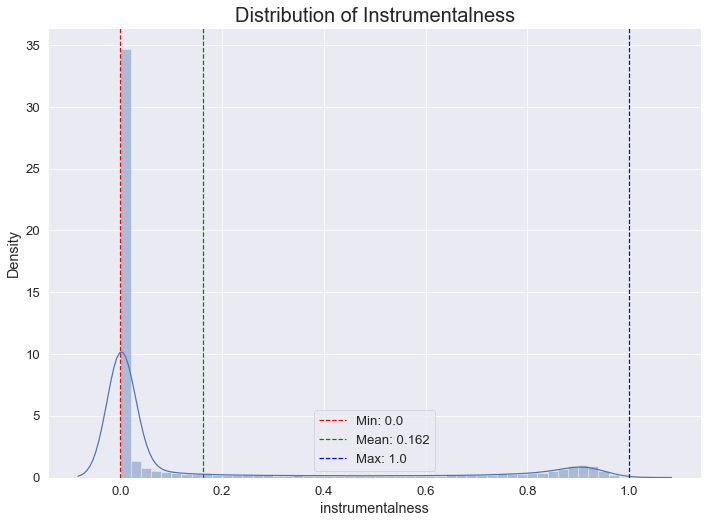

In [164]:
sns.distplot(df.instrumentalness).set_title("Distribution of Instrumentalness", fontsize=20)
plt.axvline(df.instrumentalness.min(), 0,1, label="Min: " + str(df.instrumentalness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.instrumentalness.mean(), 0,1, label="Mean: " + str(round(df.instrumentalness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.instrumentalness.max(), 0,1, label="Max: " + str(df.instrumentalness.max()), color = 'blue', linestyle='dashed')
plt.legend()

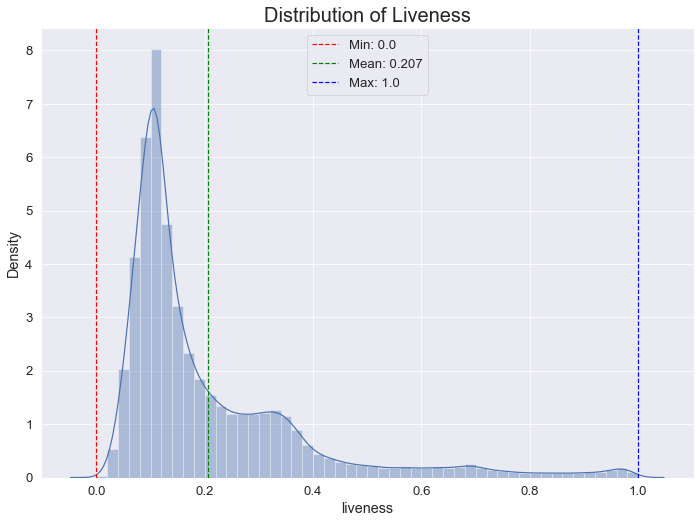

In [165]:
sns.distplot(df.liveness).set_title("Distribution of Liveness", fontsize=20)
plt.axvline(df.liveness.min(), 0,1, label="Min: " + str(df.liveness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.liveness.mean(), 0,1, label="Mean: " + str(round(df.liveness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.liveness.max(), 0,1, label="Max: " + str(df.liveness.max()), color = 'blue', linestyle='dashed')
plt.legend()

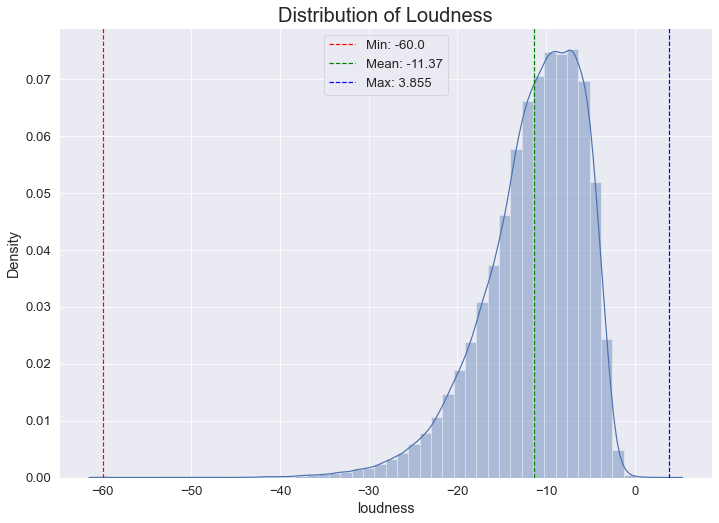

In [166]:
sns.distplot(df.loudness).set_title("Distribution of Loudness", fontsize=20)
plt.axvline(df.loudness.min(), 0,1, label="Min: " + str(df.loudness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.loudness.mean(), 0,1, label="Mean: " + str(round(df.loudness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.loudness.max(), 0,1, label="Max: " + str(df.loudness.max()), color = 'blue', linestyle='dashed')
plt.legend()

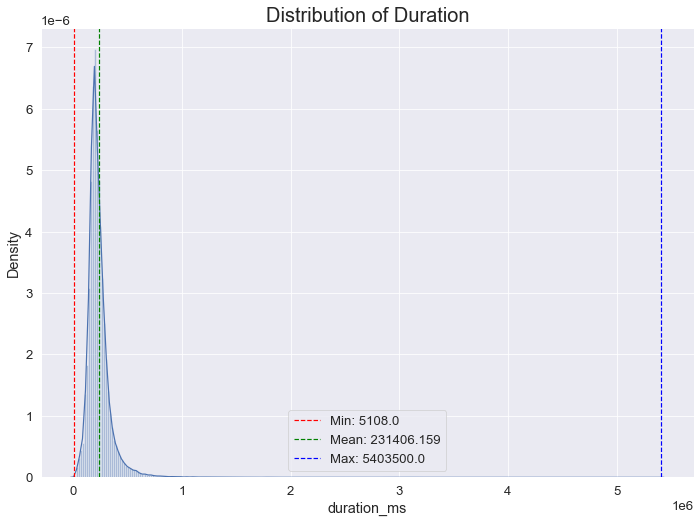

In [167]:
sns.distplot(df.duration_ms,bins=300).set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

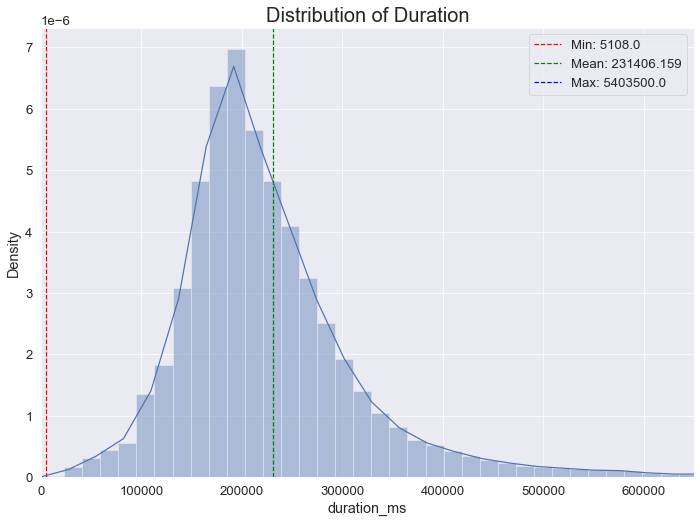

In [168]:
g = sns.distplot(df.duration_ms,bins=300)
g.set_xlim(0,650000)
g.set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [169]:
# df_release = df.groupby('release_date', as_index=False).size().sort_values(by='size',ascending=True)
# sns.distplot(df_release,  color = 'green').set_title("Distribution of Release dates", fontsize=20)

In [170]:
# ax = sns.lineplot(x=df.groupby('year', as_index=False).size(), y='popularity', data = df, ci=False, hue='Promo')

Code taken from: https://www.kaggle.com/richardcsuwandi/spotify-time-series-analysis/notebook 

In [171]:
year_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness","speechiness", 
               "year",'duration_ms', 'popularity']].groupby("year").mean().sort_values(by="year").reset_index()

year_avg.sample(10)

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,duration_ms,popularity
90,2011,0.239382,0.559822,0.671269,0.085690,0.204074,122.399306,0.479515,-7.176962,0.089902,236586.656000,53.184000
89,2010,0.228712,0.577811,0.693696,0.077971,0.201977,123.436965,0.525811,-6.694271,0.086007,243543.909500,52.763500
28,1949,0.907895,0.441623,0.244627,0.293479,0.210266,108.876601,0.428594,-15.610530,0.103308,225385.410000,3.307000
84,2005,0.246817,0.576301,0.659767,0.081082,0.189186,122.115655,0.533184,-7.298013,0.094066,238882.838000,50.347500
38,1959,0.777088,0.488865,0.316798,0.178835,0.196394,112.506105,0.487513,-14.324556,0.071848,216623.042000,19.805000
57,1978,0.316199,0.544783,0.570142,0.098768,0.223904,121.092253,0.594658,-10.764040,0.063965,252205.343500,35.705500
26,1947,0.915399,0.472399,0.258911,0.344697,0.220693,109.272361,0.506145,-14.593787,0.100910,232983.251425,1.161495
91,2012,0.236197,0.571695,0.669811,0.069288,0.195129,122.099837,0.474657,-6.999709,0.083701,242556.937500,54.340000
42,1963,0.712598,0.486331,0.373388,0.190614,0.203516,114.546598,0.549899,-13.602048,0.054633,200297.139500,24.365000
27,1948,0.934265,0.439915,0.247542,0.392072,0.221532,107.375217,0.443625,-15.512074,0.086625,207500.813704,1.582441


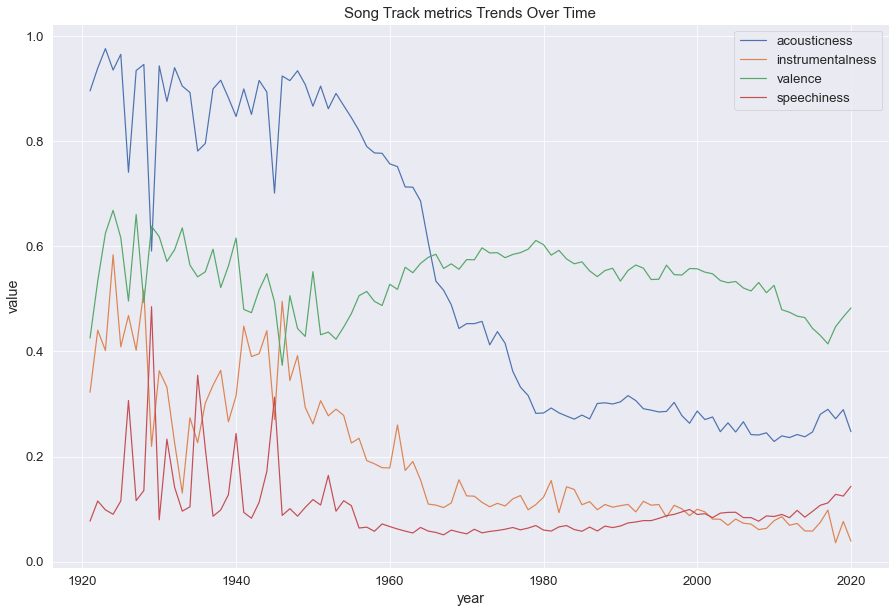

In [172]:
plt.figure(figsize=(15,10))
plt.title("Song Track metrics Trends Over Time", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["acousticness","instrumentalness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

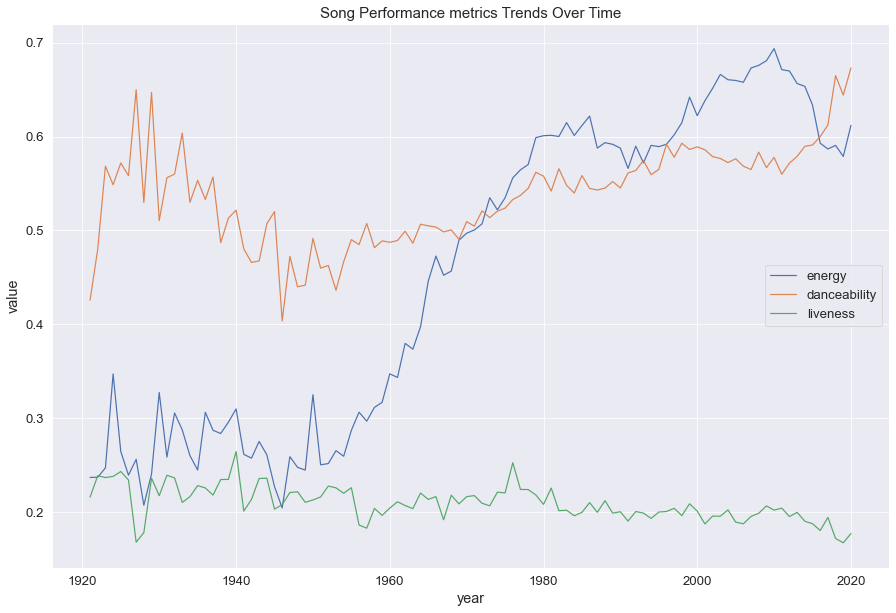

In [173]:
plt.figure(figsize=(15,10))
plt.title("Song Performance metrics Trends Over Time", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["energy", "danceability", "liveness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

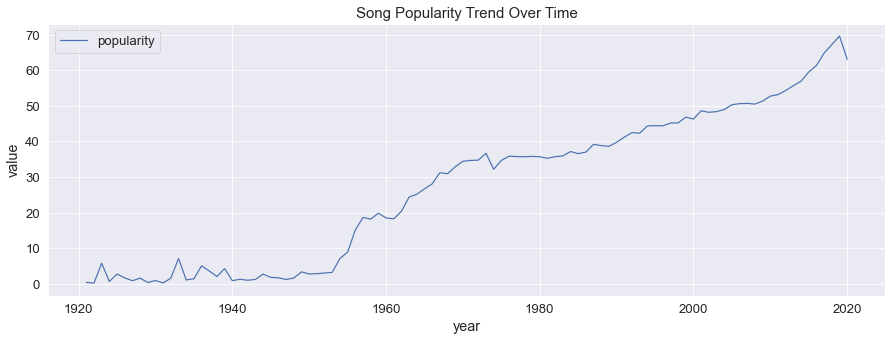

In [174]:
plt.figure(figsize=(15,5))
plt.title("Song Popularity Trend Over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='popularity', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['popularity'])

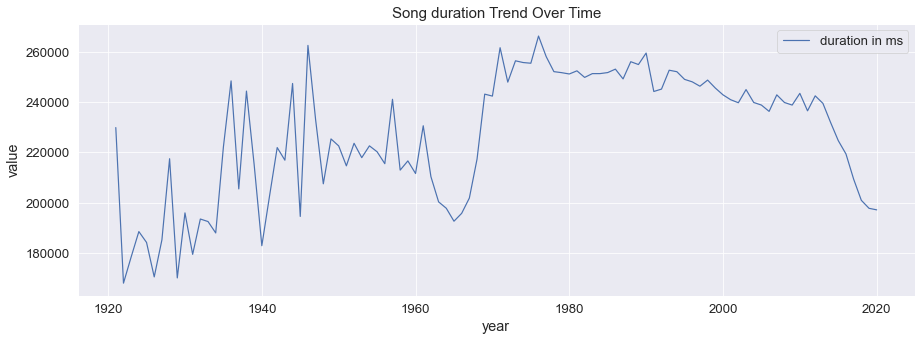

In [175]:
plt.figure(figsize=(15,5))
plt.title("Song duration Trend Over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='duration_ms', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['duration in ms'])

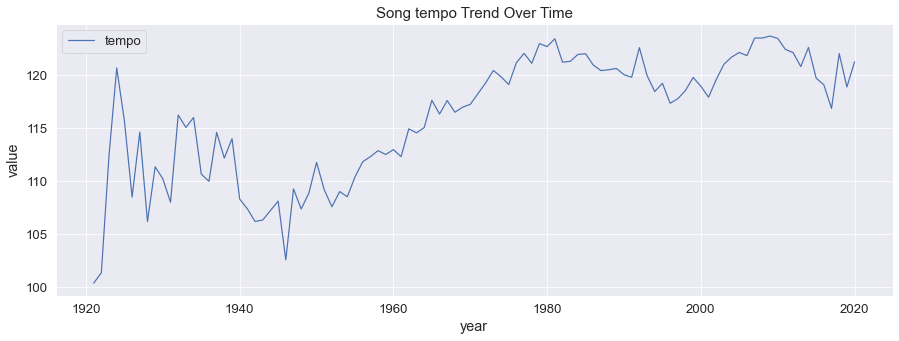

In [176]:
plt.figure(figsize=(15,5))
plt.title("Song tempo Trend Over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='tempo', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['tempo'])

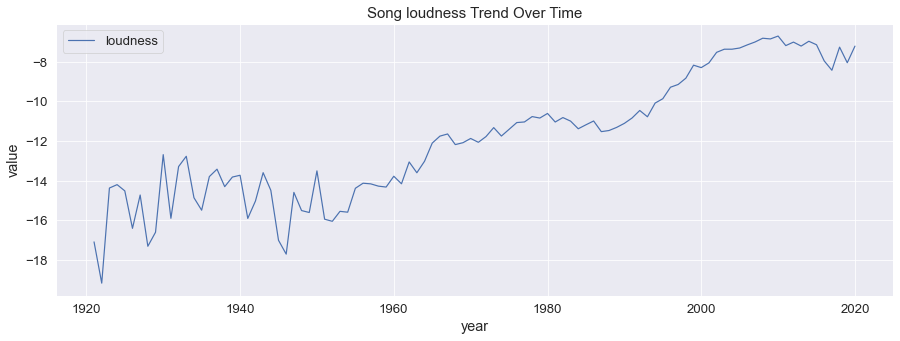

In [177]:
plt.figure(figsize=(15,5))
plt.title("Song loudness Trend Over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='loudness', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['loudness'])

In [178]:
pop_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness","speechiness", 
               "year",'duration_ms', 'popularity']].groupby("popularity").mean().sort_values(by="popularity").reset_index()

pop_avg.sample(10)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,year,duration_ms
28,28.0,0.418370,0.514856,0.526307,0.132247,0.221951,120.092697,0.562573,-11.817543,0.062714,1975.365354,237100.039791
84,84.0,0.278895,0.655340,0.619277,0.005676,0.177581,115.314043,0.451151,-6.467426,0.091055,2018.765957,203004.574468
51,51.0,0.286093,0.568778,0.624861,0.083369,0.188777,121.147930,0.534814,-8.493854,0.076990,1998.733851,241983.600981
80,80.0,0.205832,0.686409,0.651131,0.022867,0.156257,121.445009,0.535154,-6.522183,0.091202,2013.773913,215214.495652
36,36.0,0.357120,0.542529,0.559974,0.116525,0.201236,119.463775,0.555941,-10.818326,0.074044,1983.647667,244171.479515
20,20.0,0.607185,0.501984,0.422437,0.172633,0.221841,116.038822,0.550793,-13.025353,0.076431,1965.352490,224678.273946
23,23.0,0.513274,0.507629,0.462574,0.137769,0.226562,116.930199,0.543199,-12.648890,0.065657,1970.318454,236154.695812
85,85.0,0.307664,0.705167,0.614944,0.005430,0.159119,125.679194,0.486869,-5.929694,0.091650,2018.694444,203556.944444
9,9.0,0.816417,0.489247,0.297189,0.246749,0.209865,112.093796,0.491221,-14.390032,0.081187,1954.282091,215219.819370
93,93.0,0.150500,0.819667,0.663667,0.000001,0.085667,115.641667,0.719000,-5.310000,0.100000,2019.000000,193251.333333


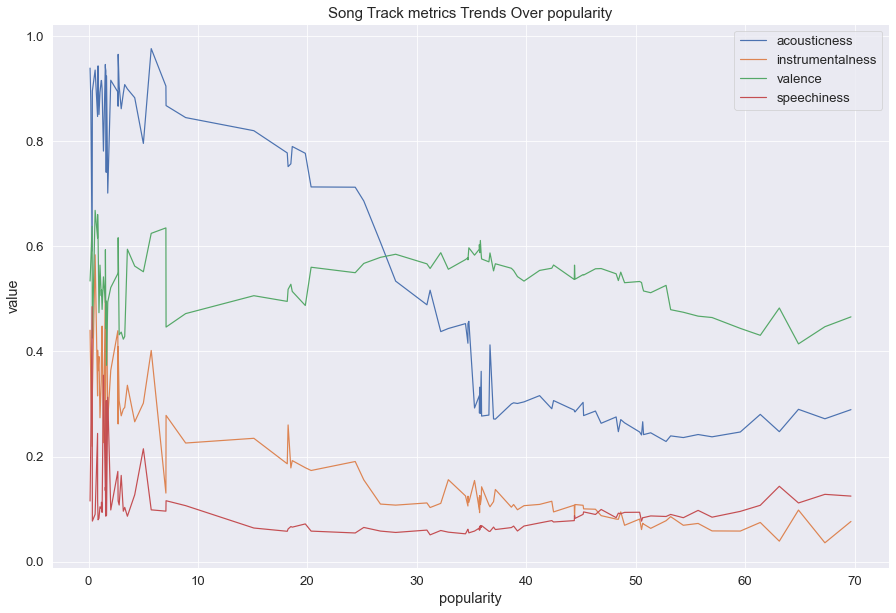

In [179]:
plt.figure(figsize=(15,10))
plt.title("Song Track metrics Trends Over popularity", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["acousticness","instrumentalness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='popularity', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

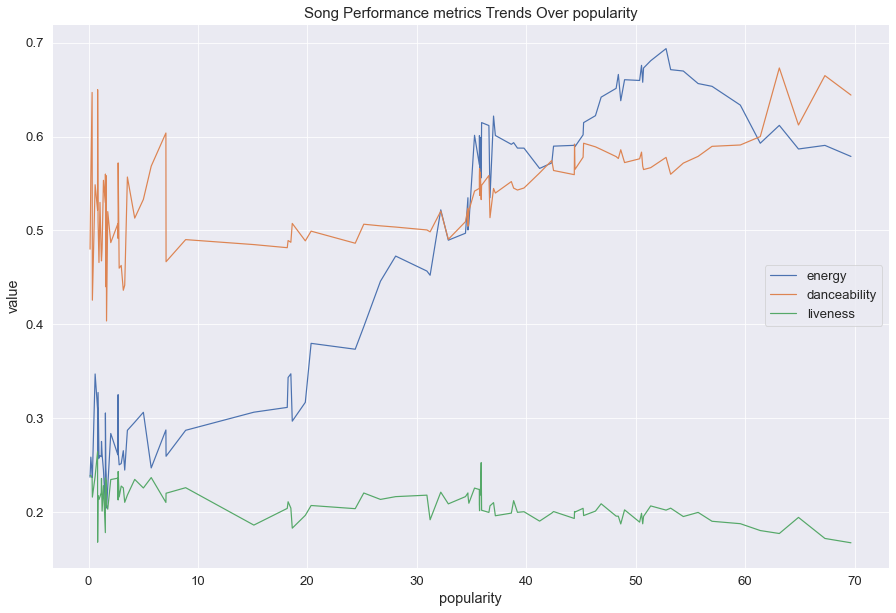

In [180]:
plt.figure(figsize=(15,10))
plt.title("Song Performance metrics Trends Over popularity", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["energy","danceability", "liveness"]

for line in lines:
    ax = sns.lineplot(x='popularity', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

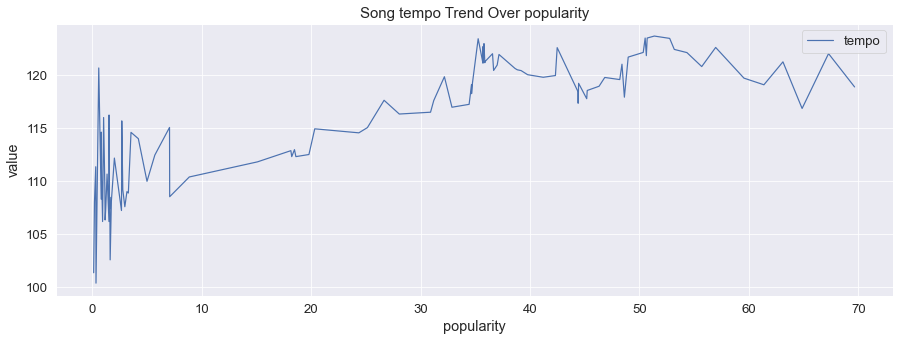

In [181]:
plt.figure(figsize=(15,5))
plt.title("Song tempo Trend Over popularity", fontdict={"fontsize": 15})

ax = sns.lineplot(x='popularity', y='tempo', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['tempo'])

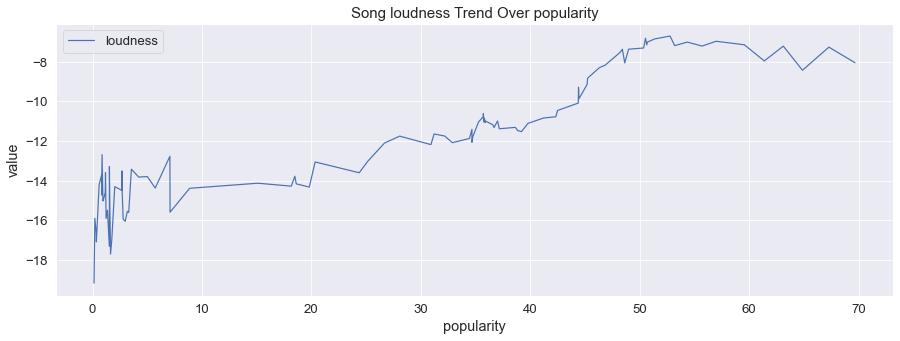

In [182]:
plt.figure(figsize=(15,5))
plt.title("Song loudness Trend Over popularity", fontdict={"fontsize": 15})

ax = sns.lineplot(x='popularity', y='loudness', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['loudness'])

In [183]:
df["artists"].sample(10)

156588                     ['Crosby, Stills, Nash & Young']
13986                                  ['Widespread Panic']
137755                                      ['Eartha Kitt']
76653                            ['Sergio Vega "El Shaka"']
38826                                      ['Eliane Elias']
166186                                     ['Marcos Valle']
145283                               ['Orchestra Studio 7']
4463                                          ['Minutemen']
143886                                      ['Yellow Days']
330       ['Ludwig van Beethoven', 'London Symphony Orch...
Name: artists, dtype: object

In [184]:
all_artists = []
for i in df["artists"]: 
    i = eval(i) #convert string of list to list type
    for j in i:
        all_artists.append(j)
all_artists[:10]

['Carl Woitschach',
 'Robert Schumann',
 'Vladimir Horowitz',
 'Seweryn Goszczyński',
 'Francisco Canaro',
 'Frédéric Chopin',
 'Vladimir Horowitz',
 'Felix Mendelssohn',
 'Vladimir Horowitz',
 'Franz Liszt']

In [185]:
print(len(all_artists))

225456


In [186]:
artists_names = pd.DataFrame(all_artists, columns=['artist'])
artists_names = artists_names.groupby('artist')['artist'].count().reset_index(name="song_count")
artists_names= pd.DataFrame(artists_names.sort_values(by="song_count",  ascending=False))
artists_names

,artist,song_count
8039,Francisco Canaro,2234
27525,Эрнест Хемингуэй,1215
8298,Frédéric Chopin,1035
14826,Ludwig van Beethoven,976
26605,Wolfgang Amadeus Mozart,938
...,...,...
14300,Livingston Taylor,1
14302,"Liz Callaway, Howard McGillin, David Zippel, L...",1
14303,Liz Damon's Orient Express,1
2365,Bernard Leighton,1


In [187]:
artists_with_more_than_500_songs = artists_names[artists_names['song_count']>500]

<AxesSubplot:xlabel='artist', ylabel='song_count'>

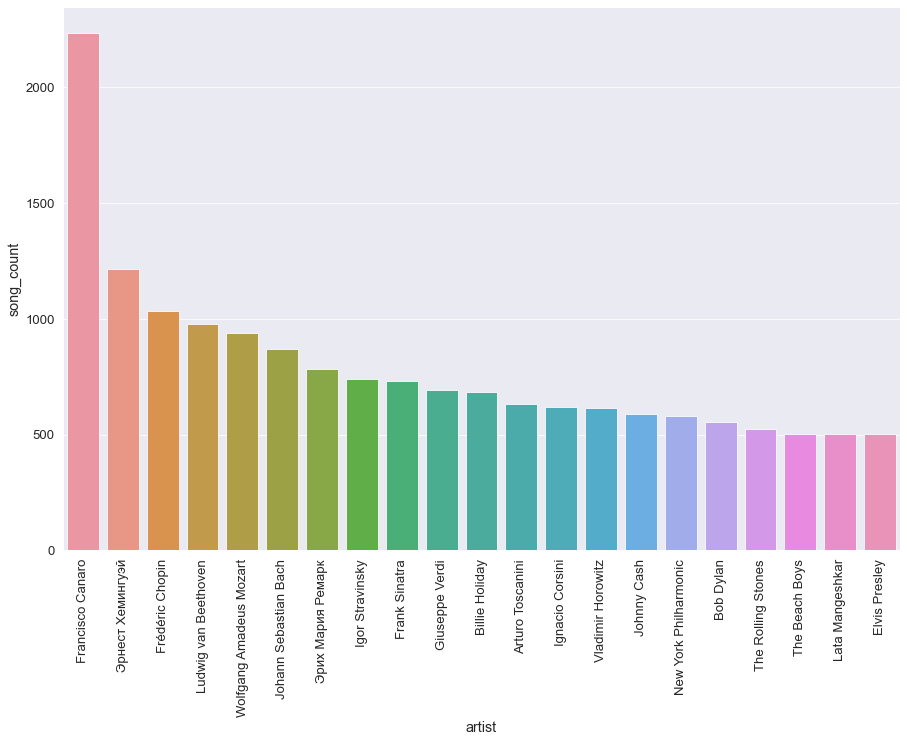

In [188]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x="artist", y="song_count", data=artists_with_more_than_500_songs)

## Models

In [189]:
lbc = LabelEncoder()

In [190]:
for col in categorical_columns:
    df[col] = lbc.fit_transform(df[col])
    print(lbc.classes_)

['["\'In The Heights\' Original Broadway Company", \'Mandy Gonzalez\']'
 '["\'In The Heights\' Original Broadway Company"]'
 '["\'Legally Blonde\' Ensemble", \'Michael Rupert\', \'Nikki Snelson\']'
 ... "['黃國隆']" "['黃蜀娟']" "['黑豹']"]
['!Que Vida! - Mono Version' '"40"' '"40" - Live' ... '행복 (Happiness)'
 "헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, Can't Breakaway Boy (feat. 정인 Jung In)"
 '화려하지 않은 고백 Confession Is Not Flashy']
['1921' '1921-02-20' '1921-03-20' ... '2020-06-16' '2020-06-17'
 '2020-06-18']


### Decision Trees

In [191]:
clf = DecisionTreeClassifier()

In [192]:
X = df.drop(columns=['popularity'])
Y = df['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [193]:
clf = clf.fit(x_train, y_train)

In [194]:
y_pred = clf.predict(x_test)

In [195]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="weighted"))
print(metrics.f1_score(y_test,y_pred, average="weighted"))

0.17774115708316168
0.17860193047036932
0.17809958326144937


### Random Forest

In [196]:
rf = RandomForestRegressor(n_estimators=15, random_state=42)

In [197]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=42)

In [198]:
y_pred = rf.predict(x_test)

In [199]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

In [200]:
rmse

8.77428394751658

### Feature Importance

In [201]:
features = df.drop(columns=['popularity'])
feature_list = list(features.columns)

In [202]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: release_date         Importance: 0.81
Variable: year                 Importance: 0.03
Variable: artists              Importance: 0.02
Variable: acousticness         Importance: 0.01
Variable: danceability         Importance: 0.01
Variable: duration_ms          Importance: 0.01
Variable: energy               Importance: 0.01
Variable: instrumentalness     Importance: 0.01
Variable: key                  Importance: 0.01
Variable: liveness             Importance: 0.01
Variable: loudness             Importance: 0.01
Variable: name                 Importance: 0.01
Variable: speechiness          Importance: 0.01
Variable: tempo                Importance: 0.01
Variable: valence              Importance: 0.01
Variable: explicit             Importance: 0.0
Variable: mode                 Importance: 0.0


## Regression

In [203]:
X1 = df[['acousticness', 'danceability', 
            'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

Y1 = df[['popularity']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:56:51   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398  

In [204]:
lr_stats = sm.OLS(Y1, X1).fit()

# print the coefficients
lr_stats.params
lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:56:51   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398    102.851      0.000      40.123      41.682
acousticness       -23.2082      0.168   -138.233      0.000     -23.537     -22.879
danceability        27.0802      0.298     90.813      0.000      26.496      27.665
duration_ms       5.166e-07   3.29e-07      1.571      0.116   -1.28e-07    1.16e-06
energy              11.1166      0.318     35.013      0.000      10.494      11.739
instrumentalness    -7.0411      0.144    -48.797      0.000      -7.324      -6.758
liveness            -7.6301      0.228    -33.425      0.000      -8.078      -7.183
loudness             0.3234      0.012     26.790      0.000       0.300       0.347
speechiness        -25.7627      0.278    -92.590      0.000     -26.308     -25.217
tempo                0.0256      0.001     19.357      0.000       0.023       0.028
valence            -22.9175      0.197   -116.497      0.000     -23.303     -22.532
==============================================================================
Omnibus:                     7118.213   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8048.157
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       3.224   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
X2 = df[['acousticness', 'danceability']]#, 
            # 'energy', 'instrumentalness', 
            # 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
Y2 = df[['popularity']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 4.704e+04
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:56:51   Log-Likelihood:            -7.2560e+05
No. Observations:              169909   AIC:                         1.451e+06
Df Residuals:                  169906   BIC:                         1.451e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.3045      0.164    263.708   

In [206]:
X3 = df[['energy', 'instrumentalness']]
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                 3.211e+04
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:56:52   Log-Likelihood:            -7.3580e+05
No. Observations:              169909   AIC:                         1.472e+06
Df Residuals:                  169906   BIC:                         1.472e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.8058      0.105  

### Heat Maps

In [207]:
ht_df = df[['popularity','acousticness', 'danceability', 
            'duration_ms','energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

<AxesSubplot:>

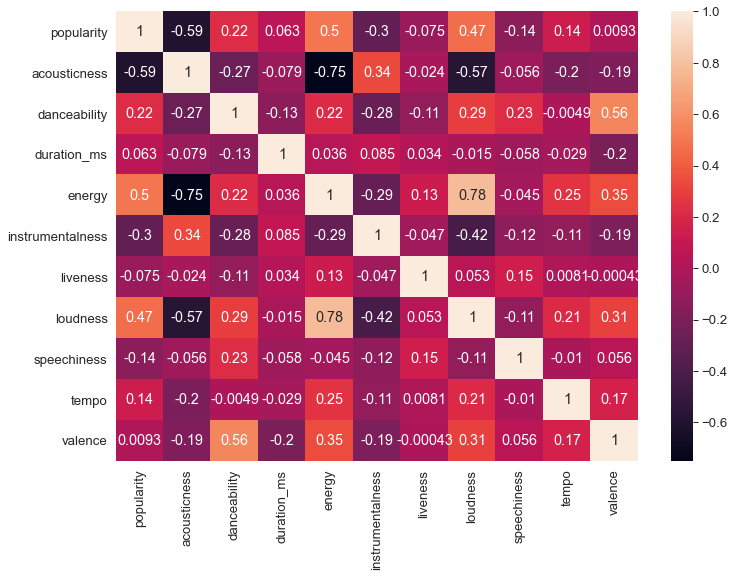

In [208]:
sns.heatmap(ht_df.corr(), annot=True)

### Label Encoder

In [209]:
X3 = df.drop(columns=['popularity'])
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 3.629e+04
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:56:55   Log-Likelihood:            -6.3281e+05
No. Observations:              169909   AIC:                         1.266e+06
Df Residuals:                  169891   BIC:                         1.266e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1275.0128      7.971  

In [210]:
# X4 = df.drop(columns=['popularity', 'track_name'])
# Y4 = df[['popularity']]
# X4 = sm.add_constant(X4)
# model4 = sm.OLS(Y4, X4).fit()
# print(model4.summary())

In [211]:
# X4 = df.drop(columns=['popularity', 'track_name', 'duration_ms', 'tempo'])
# Y4 = df[['popularity']]
# X4 = sm.add_constant(X4)
# model4 = sm.OLS(Y4, X4).fit()
# print(model4.summary())

In [212]:
# sls = df.drop(columns=['name', 'duration_ms', 'tempo'])

In [213]:
# sns.heatmap(sls.corr(), annot=True)